# AI Compass Assessment Data - Explorative Datenanalyse (EDA)

Dieses Notebook dient dazu, den generierten Datensatz `assessment_data.csv` zu untersuchen. Ziel ist es, die Verteilungen, Zusammenhänge und die Datenqualität zu verstehen.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot-Styling
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Warnungen unterdrücken
import warnings
warnings.filterwarnings('ignore')

## 1. Daten laden und Struktur prüfen

In [2]:
try:
    df = pd.read_csv('assessment_data.csv')
    print("Daten erfolgreich geladen.")
except FileNotFoundError:
    print("Datei 'assessment_data.csv' nicht gefunden. Bitte sicherstellen, dass sie im selben Ordner liegt.")

Daten erfolgreich geladen.


In [3]:
# Ersten 5 Zeilen anzeigen
df.head()

,Company_ID,Company_Name*,Industry*,Website,Employee_Count,City,Cluster_Profile,How is AI prioritized in management meetings?,Does a documented AI strategy or roadmap exist?,How is AI funding and investment handled?,...,What disclosure requirements exist for external partners?,To what extent do you use Cloud infrastructure?,What types of AI development tools are currently available in your organization? (Select all that apply),How easily can you scale new software company-wide?,Why are you doing this AI assessment?,Which business challenge is your top priority? (Select all that apply),How is AI influencing your organization’s strategy?,Who is the primary driver of AI within your organization? (Select all that apply),Are you in charge of AI initiatives?,Which option best describes your position and decision authority? (Select all that apply)
0,320,Quantum SME,Hospitality,www.quantum-sme.de,1-50,Düsseldorf,1. The Traditionalist,Rare mention in meetings,None / No plan,No budget available,...,Unknown,Fully On-Premise,A combination of pre-built and custom AI tools...,Manual/Painful,External Pressure – We are responding to exter...,Personalizing customer experiences,Reactive – We acknowledge the trend but only r...,IT / Technology Department,No,Executive / C-level
1,629,Iron Group,Finance,www.iron-group.de,251-500,Cologne,1. The Traditionalist,Not a topic / Ignored,None / No plan,No budget available,...,Unknown,Fully On-Premise,A combination of pre-built and custom AI tools...,Labor intensive,External Pressure – We are responding to exter...,"Improving customer service efficiency, Streaml...",Exploratory – We monitor trends and have initi...,"IT / Technology Department, No Clear Internal ...",Sometimes,"Senior Management, Product / Process Owner"
2,319,Skyline GmbH,Logistics,www.skyline-gmbh.de,51-250,Berlin,1. The Traditionalist,Not a topic / Ignored,None / No plan,No budget available,...,Unknown,Fully On-Premise,A combination of pre-built and custom AI tools,Labor intensive,Resource Optimization – We want to identify wh...,"Streamlining document processing, Better data ...",Innovative – We leverage AI to redefine our bu...,IT / Technology Department,Yes,"Operational Staff / Domain Expert, Data / AI S..."
3,1016,Blue Harbor Logistics,Retail,www.blue-harbor-logistics.de,500+,Frankfurt,1. The Traditionalist,Not a topic / Ignored,None / No plan,No budget available,...,Unknown,Fully On-Premise,"Not sure, A combination of pre-built and custo...",Manual/Painful,External Pressure – We are responding to exter...,"Improving customer service efficiency, Better ...",Strategic – AI is a key planning driver with a...,"Sales & Marketing, Executive Leadership / Board",No,Data / AI Specialist
4,241,Vantage Logistics,Hospitality,www.vantage-logistics.de,51-250,Cologne,1. The Traditionalist,Not a topic / Ignored,Rough ideas shared,No budget available,...,Defined by Partners,Modernized On-Prem,A combination of pre-built and custom AI tools,Manual/Painful,External Pressure – We are responding to exter...,Better data analysis and insights,Exploratory – We monitor trends and have initi...,"Data Science / Analytics Specialists, Operatio...",No,"External Consultant / Advisor, Business Analys..."


In [4]:
# Infos zu Datentypen und fehlenden Werten
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 40 columns):
 #   Column                                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                                            --------------  ----- 
 0   Company_ID                                                                                                                                                                                        500 non-null    int64 
 1   Company_Name*                                                                                                                                                                                     500 non-null    object
 2   In

## 2. Univariate Analyse (Verteilungen)

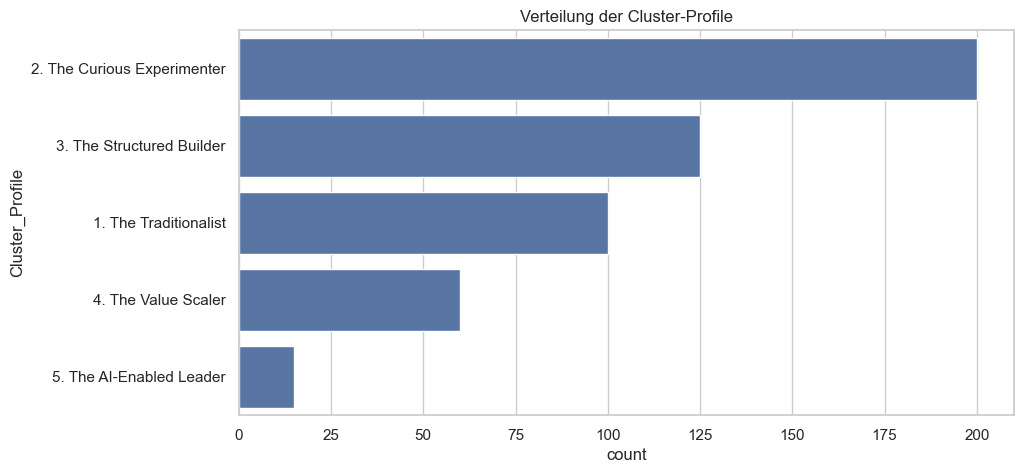

In [5]:
# Verteilung der Cluster-Profile
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Cluster_Profile', order=df['Cluster_Profile'].value_counts().index)
plt.title('Verteilung der Cluster-Profile')
plt.show()

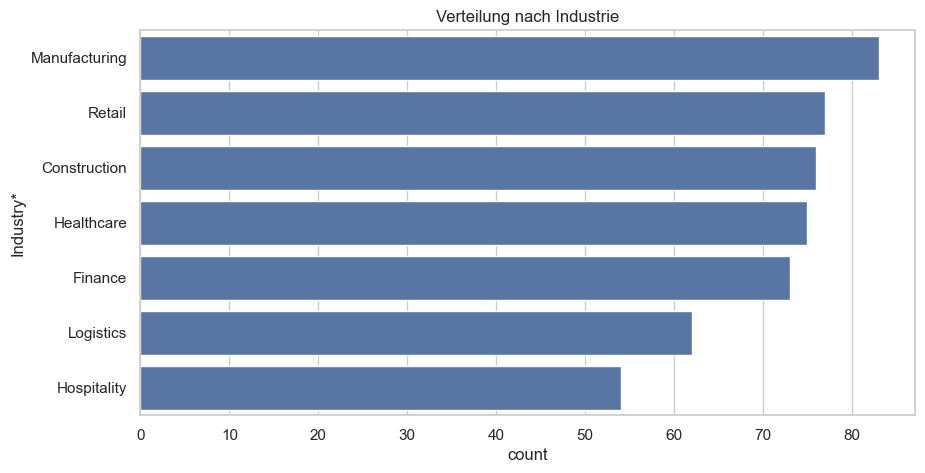

In [6]:
# Verteilung nach Industrie
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Industry*', order=df['Industry*'].value_counts().index)
plt.title('Verteilung nach Industrie')
plt.show()

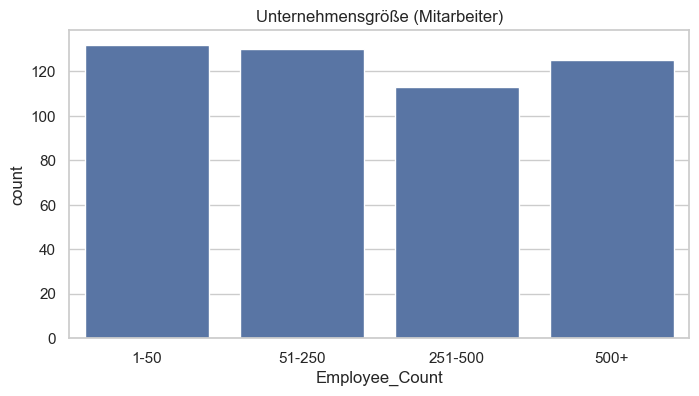

In [7]:
# Mitarbeiteranzahl
plt.figure(figsize=(8, 4))
order = ["1-50", "51-250", "251-500", "500+"] # Logische Reihenfolge
sns.countplot(data=df, x='Employee_Count', order=order)
plt.title('Unternehmensgröße (Mitarbeiter)')
plt.show()

## 3. Analyse der Antworten

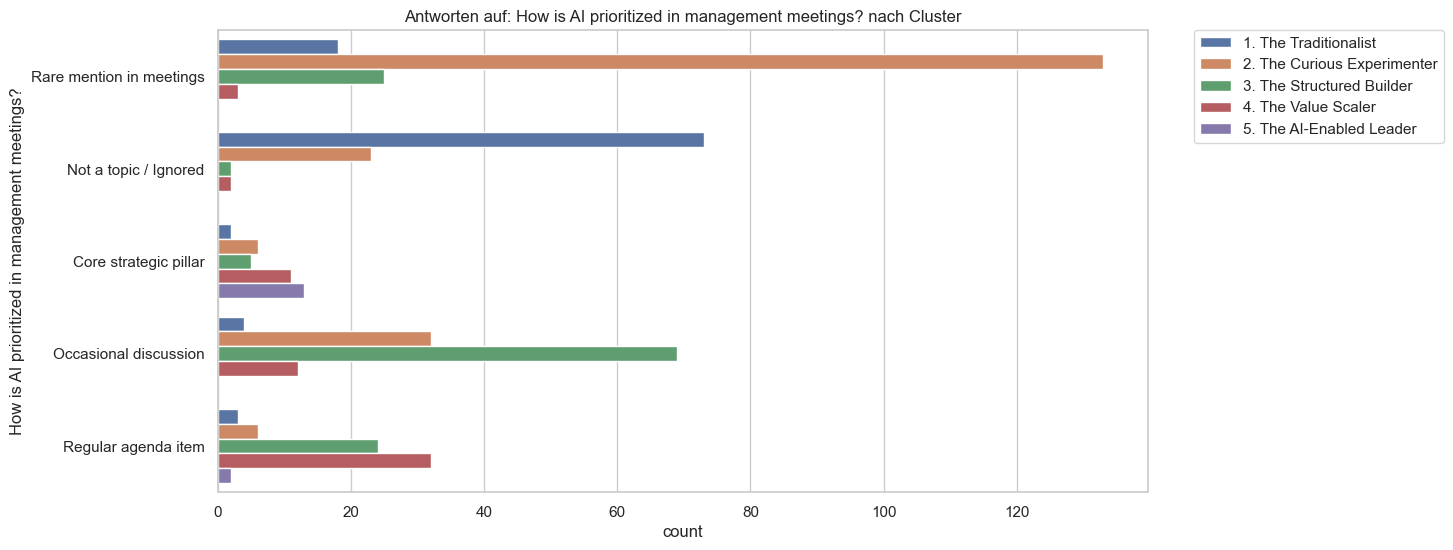

In [8]:
# Beispiel: Wie unterschiedlich antworten die Cluster auf eine Frage?
# Wir suchen uns eine Spalte raus, z.B. die erste Frage zur Strategie
# (Der Spaltenname muss exakt stimmen - wir nehmen hier exemplarisch eine Spalte)

target_col = "How is AI prioritized in management meetings?"

if target_col in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=target_col, hue='Cluster_Profile')
    plt.title(f'Antworten auf: {target_col} nach Cluster')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
else:
    print(f"Spalte '{target_col}' nicht gefunden. Bitte Spaltennamen prüfen:")
    # print(df.columns.tolist())